#### Wykres linowy

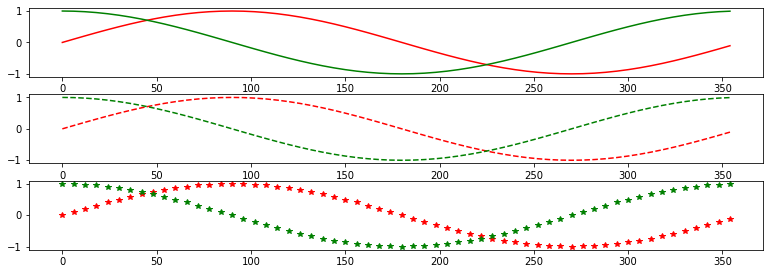

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

plt.figure(figsize=(12,3))
x = np.arange(0,360,6)
y = [math.sin(math.radians(value)) for value in x]
z = [math.cos(math.radians(value)) for value in x]

plt.subplot(311)
plt.plot(x,y,'r')
plt.plot(x,z,'g')

plt.subplot(312)
plt.plot(x,y, 'r--', x,z, 'g--')

plt.subplot(313)
dataSin = np.array([x,y])
dataCos = np.array([x,z])
plt.plot(dataSin[0], dataSin[1], 'r*')
plt.plot(dataCos[0], dataCos[1], 'g*')

plt.subplots_adjust(top=1.92, bottom=0.8, left=0.10, right=0.95, hspace=0.25, wspace=0.35)


#### Wykres z pseudokolorami

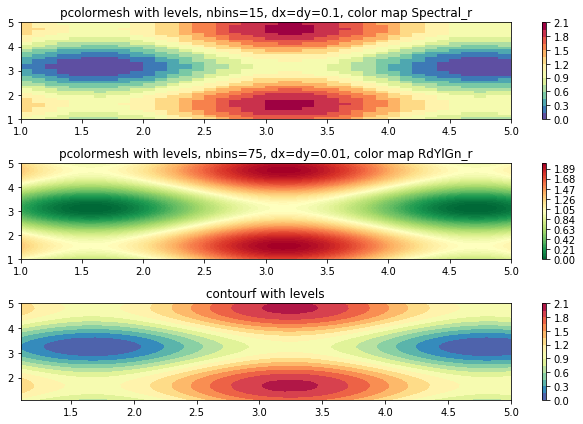

In [12]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

def set_graph_data(dx=0.1, dy=0.1):

    y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]
    z = np.cos(x)**2+np.sin(y)**2 
    z = z[:-1, :-1]    
    return x, y, z

x, y, z = set_graph_data(0.1, 0.1)
 
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max()) 

cmap = plt.get_cmap('Spectral_r') 

norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3)
fig.set_figheight(6)
fig.set_figwidth(9)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels, nbins=15, dx=dy=0.1, color map Spectral_r')

levels2 = MaxNLocator(nbins=75).tick_values(z.min(), z.max()) 
cmap2 = plt.get_cmap('RdYlGn_r') 
norm2 = BoundaryNorm(levels2, ncolors=cmap2.N, clip=False)

x, y, z = set_graph_data(0.01, 0.01)

im = ax1.pcolormesh(x, y, z, cmap=cmap2, norm=norm2)
fig.colorbar(im, ax=ax1)
ax1.set_title('pcolormesh with levels, nbins=75, dx=dy=0.01, color map RdYlGn_r')

dx = 0.1
dy = 0.1
x, y, z = set_graph_data(dx, dy)
cf = ax2.contourf(x[:-1, :-1] + dx,
                  y[:-1, :-1] + dy, z, levels=levels, 
                  cmap=cmap)
fig.colorbar(cf, ax=ax2)
ax2.set_title('contourf with levels')

fig.tight_layout()

plt.show()